In [10]:
import pandas as pd
import matplotlib.pyplot as plt
from importlib import reload
from os import getcwd
import numpy as np
import os

import sys

In [11]:
home_path = os.path.join(getcwd(), '..','..','..')
data_path = os.path.join(home_path, 'seaa-energy','integrate-data','data')
data_path

'C:\\Users\\ohjartarson\\Code\\se_advanced_analytics\\seaa-energy\\entsoe-get-started\\notebooks\\..\\..\\..\\seaa-energy\\integrate-data\\data'

In [12]:

df_load = pd.read_pickle(os.path.join(data_path, 'df_load.pkl'), compression='gzip')
df_price = pd.read_pickle(os.path.join(data_path, 'df_price_day_ahead.pkl'), compression='gzip')
df_load_day_ahead = pd.read_pickle(os.path.join(data_path, 'df_load_day_ahead.pkl'), compression='gzip')
df_capacity_day_ahead = pd.read_pickle(os.path.join(data_path, 'df_capacity_day_ahead.pkl'), compression='gzip')
df_flow_day_ahead = pd.read_pickle(os.path.join(data_path, 'df_flow_day_ahead.pkl'), compression='gzip')
df_price_day_ahead = pd.read_pickle(os.path.join(data_path, 'df_price_day_ahead.pkl'), compression='gzip')
df_generation_day_ahead = pd.read_pickle(os.path.join(data_path, 'df_generation_day_ahead.pkl'), compression='gzip')
df_generation_type = pd.read_pickle(os.path.join(data_path, 'df_generation_type.pkl'), compression='gzip')
df_water_storage = pd.read_pickle(os.path.join(data_path, 'df_water_storage.pkl'), compression='gzip')


<AxesSubplot:>

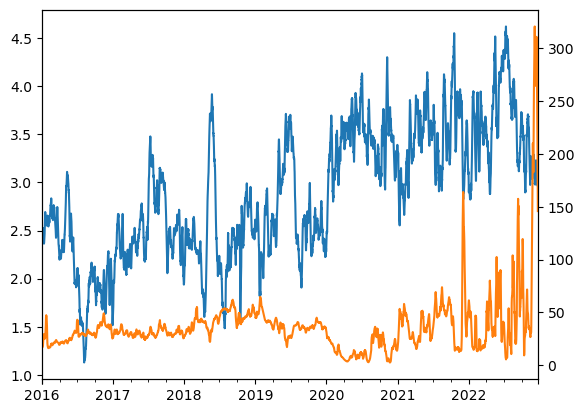

In [13]:
df_generation_day_ahead['SE_2'].div(df_load_day_ahead['SE_2']).rolling(24*7, min_periods=24*5).mean().plot()
df_price_day_ahead['SE_2'].rolling(24*7, min_periods=24*5).mean().plot(secondary_y = True)

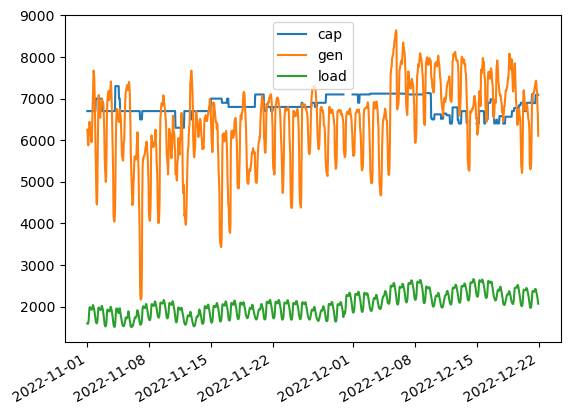

In [14]:
df_capacity_day_ahead.loc[df_capacity_day_ahead.index>'2022-11-01','SE_2']['SE_3'].rolling(1).mean().plot(secondary_y = False)
df_generation_day_ahead.loc[df_generation_day_ahead.index>'2022-11-01','SE_2'].rolling(1).mean().plot(secondary_y = False)
ax = df_load_day_ahead.loc[df_load_day_ahead.index>'2022-11-01','SE_2'].rolling(1).mean().plot(secondary_y = False)

ax.legend(['cap', 'gen', 'load'])

Text(0.5, 1.0, 'Load SE')

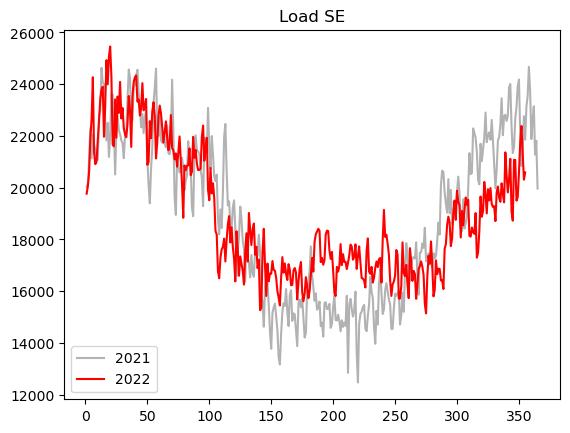

In [15]:
window = 1
bz = 'SE'
df_load_yearly = (
    df_generation_day_ahead[bz]
    #df_load_day_ahead[bz].rolling(window, min_periods=window-10).mean()
    .groupby([df_generation_day_ahead.index.year, df_generation_day_ahead.index.dayofyear]).mean()
    .unstack(level=0)
)
f, ax = plt.subplots()
df_load_yearly.loc[:,df_load_yearly.columns==2021].plot(ax=ax,color='grey', alpha = 0.6)
df_load_yearly.loc[:,df_load_yearly.columns==2022].plot(ax=ax,color='red')
ax.set_title(f'Load {bz}')

Text(0.5, 1.0, 'Load SE')

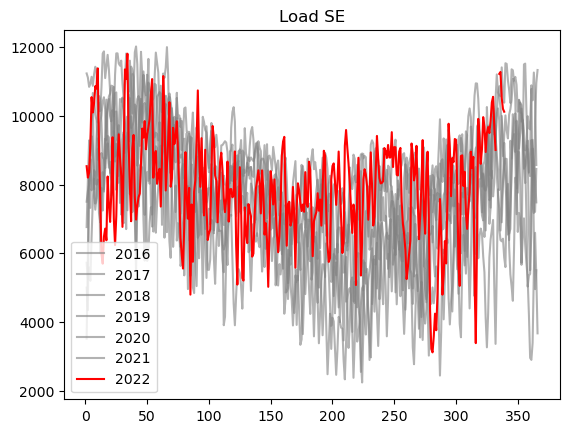

In [8]:
window = 24
bz = 'SE'
df_load_yearly = (
    df_generation_type[bz]['Hydro Water Reservoir'].rolling(window, min_periods=window-10).mean()
    #df_load_day_ahead[bz].rolling(window, min_periods=window-10).mean()
    .groupby([df_generation_type.index.year, df_generation_type.index.dayofyear]).mean()
    .unstack(level=0)
)
f, ax = plt.subplots()
df_load_yearly.loc[:,df_load_yearly.columns!=2022].plot(ax=ax,color='grey', alpha = 0.6)
df_load_yearly.loc[:,df_load_yearly.columns==2022].plot(ax=ax,color='red')
ax.set_title(f'Load {bz}')

In [163]:
df_generation_type[bz]['Hydro Water Reservoir'].dropna()

2016-01-01 00:00:00     5461.0
2016-01-01 01:00:00     5102.0
2016-01-01 02:00:00     4981.0
2016-01-01 03:00:00     4964.0
2016-01-01 04:00:00     4957.0
                        ...   
2022-11-28 08:00:00    10726.0
2022-11-28 09:00:00    10748.0
2022-11-28 10:00:00    10912.0
2022-11-28 11:00:00    10908.0
2022-11-28 12:00:00    11036.0
Name: Hydro Water Reservoir, Length: 60557, dtype: float64

In [158]:
df_generation_type[bz]['Hydro Water Reservoir'].rolling(window, min_periods=window-10).mean().dropna()

2021-12-21 13:00:00    1177.639241
2021-12-21 14:00:00    1179.842767
2021-12-21 15:00:00    1181.962500
2021-12-21 16:00:00    1183.956522
2021-12-21 17:00:00    1186.296296
                          ...     
2022-11-28 14:00:00    1172.012048
2022-11-28 15:00:00    1170.684848
2022-11-28 16:00:00    1169.347561
2022-11-28 17:00:00    1167.263804
2022-11-28 18:00:00    1165.333333
Freq: H, Name: Hydro Water Reservoir, Length: 8214, dtype: float64

In [9]:
df_load.columns

Index(['AT', 'BE', 'BG', 'CH', 'CZ', 'DE_LU', 'DK', 'DK_1', 'DK_2', 'EE', 'ES',
       'FI', 'FR', 'GR', 'HR', 'HU', 'IT', 'LT', 'LV', 'NL', 'NO', 'NO_1',
       'NO_2', 'NO_3', 'NO_4', 'PL', 'SE', 'SE_1', 'SE_2', 'SE_3', 'SE_4',
       'SI'],
      dtype='object')


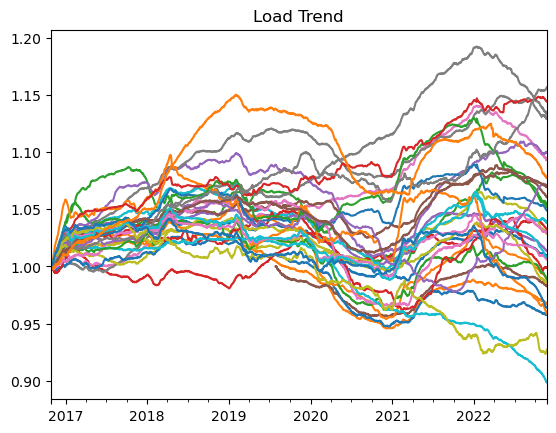

SE_1     1.156628
NO_3     1.144209
DK_1     1.133305
LT       1.129539
HR       1.100110
DK       1.093180
SI       1.077481
NO_4     1.070896
PL       1.069627
HU       1.060734
BG       1.054797
NO_2     1.052067
NO       1.049090
EE       1.038419
CH       1.032302
IT       1.030311
DK_2     1.028861
CZ       1.013775
AT       1.009048
SE_3     1.008445
SE       1.006097
GR       0.999349
FI       0.989213
FR       0.988685
LV       0.985824
DE_LU    0.982895
BE       0.967472
SE_4     0.964336
NO_1     0.958884
ES       0.957639
SE_2     0.927170
NL       0.898594
Name: 2022-11-21 07:00:00, dtype: float64

In [141]:
# Look at yearly load development, YoY trend

df_load_yearly = df_load.rolling(24*365, min_periods = 24*300).mean().dropna(how='all')
df_load_yearly = df_load_yearly.div(df_load_yearly.bfill().iloc[0])
df_load_yearly.plot(legend=False, title = 'Load Trend')
plt.show()
df_load_yearly.iloc[-1].sort_values(ascending=False)

## FLOW

<AxesSubplot:title={'center':'Generation type'}>

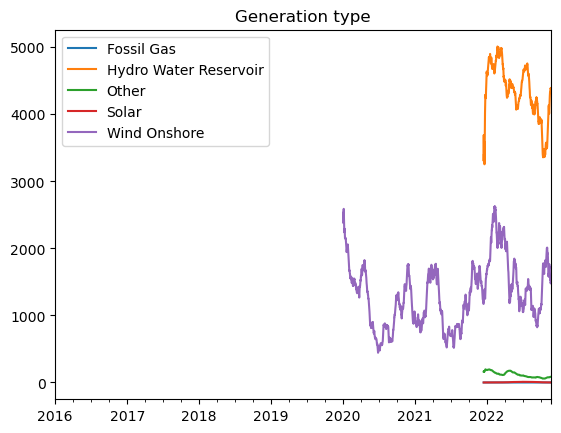

In [218]:
time_window = 24*7*4

df_generation_type['SE_2'].rolling(time_window, min_periods=10).mean().plot(title = 'Generation type', legend=True)

## PRICE

<AxesSubplot:title={'center':'Price EUR/MWh | MA1W'}>

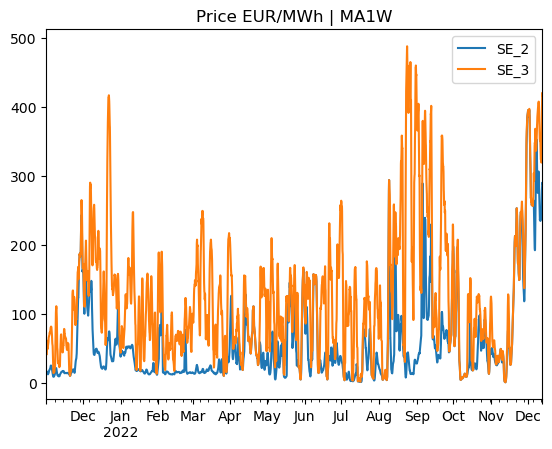

In [9]:
time_window = 24*1

df_price[(df_price.index > '2021-11-01')][['SE_2', 'SE_3']].rolling(time_window, min_periods=10).mean().plot(title = 'Price EUR/MWh | MA1W')

<AxesSubplot:>

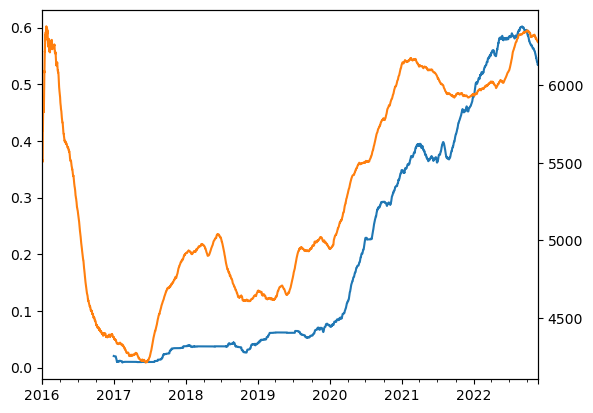

In [90]:
df_cell = df_price['SE_3'].sub(df_price['SE_2'])
df_cell = df_cell.astype(bool).astype(int)
ax = df_cell.rolling(24*365).mean().plot()
df_gen['SE_2'].rolling(24*365, min_periods = 100).mean().plot(ax=ax, secondary_y = True)
#.rolling(24).mean().plot()
#ax.legend(['share diff price SE2-SE3', 'generation SE3'])

In [77]:
df_gen['SE_3']

2015-12-31 23:00:00        NaN
2016-01-01 00:00:00    10411.0
2016-01-01 01:00:00    10361.0
2016-01-01 02:00:00    10287.0
2016-01-01 03:00:00    10242.0
                        ...   
2022-11-22 20:00:00     9959.0
2022-11-22 21:00:00     9848.0
2022-11-22 22:00:00     9716.0
2022-11-22 23:00:00     9649.0
2022-11-23 00:00:00        NaN
Freq: H, Name: SE_3, Length: 60434, dtype: float64

<AxesSubplot:title={'center':'Price EUR/MWh'}>

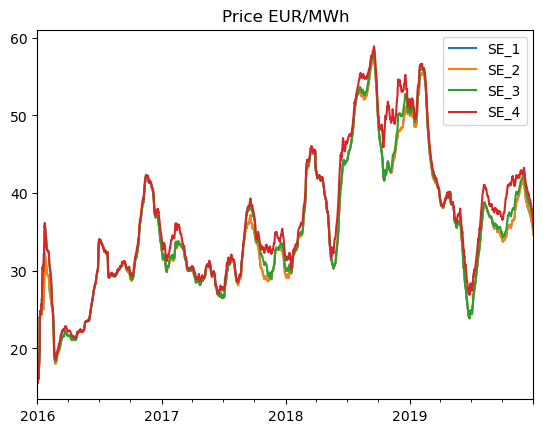

In [28]:
df_price[df_price.index < '2020'][['SE_1', 'SE_2','SE_3', 'SE_4']].rolling(time_window, min_periods=10).mean().plot(title = 'Price EUR/MWh')

In [22]:
bz = 'SE_2'

bz_in = df_flow_day_ahead.stack(level=0)[bz].unstack().sum(axis=1).rename(bz+'_flow_in')
bz_in_c = df_capacity_day_ahead.stack(level=0)[bz].unstack().sum(axis=1).rename(bz+'_cap_in')

bz_out = df_capacity_day_ahead[bz]['SE_3'].rename(bz+'_cap_out')
bz_out_f = df_flow_day_ahead[bz]['SE_3'].rename(bz+'_flow_out')
bz_prod = df_generation_day_ahead[bz].rename(bz+'_prod')
bz_load = df_load_day_ahead[bz].rename(bz+'_load')

df_sum = pd.concat([bz_in, bz_in_c, bz_out, bz_prod, bz_out_f, bz_load], axis=1)
df_sum


,SE_2_flow_in,SE_2_cap_in,SE_2_cap_out,SE_2_prod,SE_2_flow_out,SE_2_load
2015-12-31 23:00:00,NaN,NaN,NaN,NaN,NaN,NaN
2016-01-01 00:00:00,0.0,4050.0,6700.0,4266.0,1965.0,1944.0
2016-01-01 01:00:00,0.0,4050.0,6700.0,4043.0,1648.0,1917.0
2016-01-01 02:00:00,0.0,4050.0,6700.0,3881.0,1426.0,1894.0
2016-01-01 03:00:00,0.0,4050.0,6700.0,3829.0,1326.0,1893.0
...,...,...,...,...,...,...
2022-12-12 20:00:00,NaN,4014.0,6790.0,8096.0,NaN,2359.0
2022-12-12 21:00:00,NaN,4002.0,6490.0,8074.0,NaN,2311.0
2022-12-12 22:00:00,NaN,4002.0,6490.0,8017.0,NaN,2248.0
2022-12-12 23:00:00,NaN,4002.0,6490.0,7795.0,NaN,2179.0


In [24]:

window = 24

df_cell = df_sum[df_sum.index > '2020-01-01'].ffill()#.rolling(window, min_periods=window-10).mean()
df_cell = pd.concat([df_cell[['SE_2_load', 'SE_2_cap_out']].dropna().sum(axis=1).rename('demand'), df_cell[['SE_2_load', 'SE_2_cap_out']],
                     df_cell[['SE_2_prod', 'SE_2_flow_in']].dropna().sum(axis=1).rename('supply')], axis=1)
df_cell['elasticity'] = df_cell['supply'] - df_cell['demand']
df_cell.tail(24)

,demand,SE_2_load,SE_2_cap_out,supply,elasticity
2022-12-12 01:00:00,8462.0,2062.0,6400.0,6863.0,-1599.0
2022-12-12 02:00:00,8451.0,2051.0,6400.0,6789.0,-1662.0
2022-12-12 03:00:00,8454.0,2054.0,6400.0,6777.0,-1677.0
2022-12-12 04:00:00,8488.0,2088.0,6400.0,6822.0,-1666.0
2022-12-12 05:00:00,8569.0,2169.0,6400.0,7090.0,-1479.0
2022-12-12 06:00:00,8811.0,2321.0,6490.0,7437.0,-1374.0
2022-12-12 07:00:00,9219.0,2429.0,6790.0,7893.0,-1326.0
2022-12-12 08:00:00,9247.0,2457.0,6790.0,7915.0,-1332.0
2022-12-12 09:00:00,9248.0,2458.0,6790.0,8032.0,-1216.0
2022-12-12 10:00:00,9233.0,2443.0,6790.0,8095.0,-1138.0


,2020,2021,2022
1,6600.000000,6700.0,6500.000000
2,6600.000000,6700.0,6500.000000
3,6600.000000,6700.0,6633.333333
4,6600.000000,6700.0,6633.333333
5,6600.000000,6700.0,6833.333333
...,...,...,...
343,6600.000000,6550.0,7057.708333
344,6500.000000,6550.0,6591.500000
345,6500.000000,6400.0,6594.916667
346,6500.000000,6400.0,6642.500000


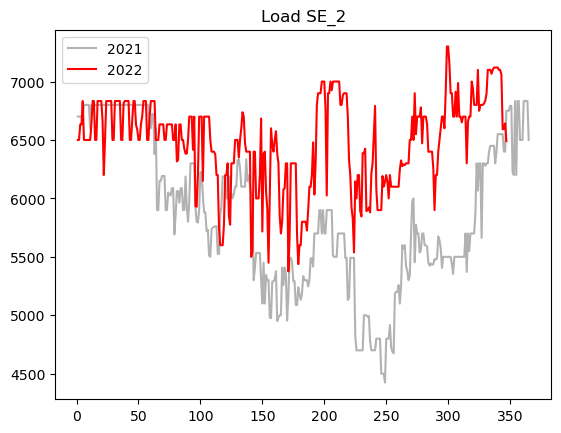

In [27]:

df_load_yearly = (
    df_cell['SE_2_cap_out']
    .groupby([df_cell.index.year, df_cell.index.dayofyear]).mean()
    .unstack(level=0)
)
f, ax = plt.subplots()
#df_load_yearly.loc[:,df_load_yearly.columns==2020].plot(ax=ax,color='blue', alpha = 0.6)
df_load_yearly.loc[:,df_load_yearly.columns==2021].plot(ax=ax,color='grey', alpha = 0.6)
df_load_yearly.loc[:,df_load_yearly.columns==2022].plot(ax=ax,color='red')
ax.set_title(f'Load {bz}')
df_load_yearly.dropna()

In [18]:
window = 24
df_cell = df_sum
df_cell = df_cell[['SE_2_in', 'SE_2_prod']].ffill().sum(axis=1).sub(df_cell[['SE_2_cap_SE_3', 'SE_2_load']].ffill().sum(axis=1))
                                                                                      
ax = df_cell[df_cell.index > '2020-01-01'].rolling(window, min_periods=window-10).mean().plot()
df_price.loc[df_price.index > '2020-01-01', 'SE_2'].rolling(window, min_periods=window-10).mean().plot(ax=ax, secondary_y = True)
ax.axhline(0, ls='--', c='red')

KeyError: "['SE_2_in'] not in index"

Text(0.5, 1.0, 'Load SE_2')

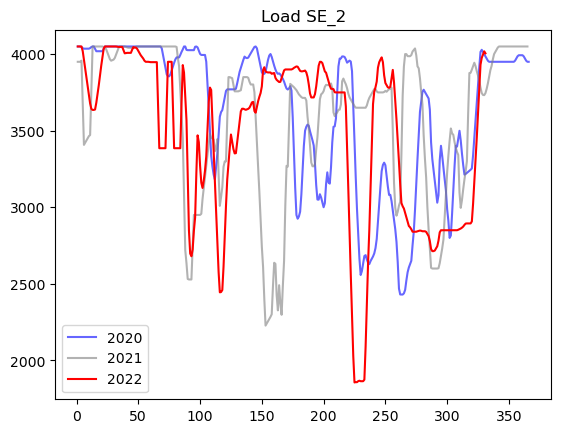

In [85]:
df_cell = df_sum

window = 24*7
bz = 'SE_2'
df_cell = df_cell[['SE_2_in_cap']].dropna(axis=1, how='all').sum(axis=1)
df_load_yearly = (
    df_cell.rolling(window, min_periods=window-10).mean()
    .groupby([df_cell.index.year, df_cell.index.dayofyear]).mean()
    .unstack(level=0)
)
f, ax = plt.subplots()
df_load_yearly.loc[:,df_load_yearly.columns==2020].plot(ax=ax,color='blue', alpha = 0.6)
df_load_yearly.loc[:,df_load_yearly.columns==2021].plot(ax=ax,color='grey', alpha = 0.6)
df_load_yearly.loc[:,df_load_yearly.columns==2022].plot(ax=ax,color='red')
ax.set_title(f'Load {bz}')

Text(0.5, 1.0, 'Load SE')

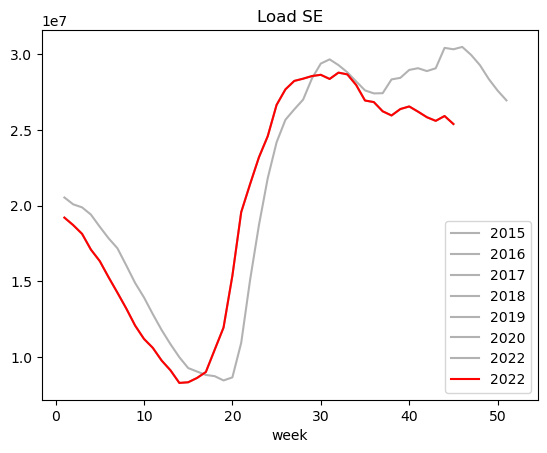

In [174]:

window = 1
bz = 'SE'
df_cell = df_water_storage[bz]
df_load_yearly = (
    df_cell.rolling(window).mean()
    .groupby([df_cell.index.year, df_cell.index.isocalendar().week]).mean()
    .unstack(level=0)
)
f, ax = plt.subplots()
#df_load_yearly.loc[:,df_load_yearly.columns==2020].plot(ax=ax,color='blue', alpha = 0.6)
df_load_yearly.loc[:,df_load_yearly.columns!=2021].plot(ax=ax,color='grey', alpha = 0.6)
df_load_yearly.loc[:,df_load_yearly.columns==2022].plot(ax=ax,color='red')
ax.set_title(f'Load {bz}')

In [171]:
df_load_yearly

,2015,2016,2017,2018,2019,2020,2021,2022
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19630000.0
3,NaN,NaN,NaN,NaN,NaN,NaN,24806000.0,NaN
5,NaN,NaN,NaN,NaN,NaN,20546000.0,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
360,NaN,NaN,NaN,NaN,NaN,NaN,20849000.0,NaN
361,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
363,NaN,NaN,NaN,NaN,20727000.0,NaN,NaN,NaN
364,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


300    8416.173053
301    8421.759549
302    8431.399740
303    8455.722470
304    8475.520585
305    8489.771205
306    8517.423239
307    8545.264137
308    8575.383309
309    8617.676091
310    8648.521019
311    8676.685888
312    8714.587860
313    8743.165737
314    8776.333395
315    8817.331473
316    8845.911148
317    8885.224578
318    8926.687500
319    8965.462798
320    9005.883867
321    9036.726873
322    9083.125992
323    9131.132192
324    9192.806114
325    9271.363467
326    9357.285962
327    9438.183842
328    9512.819010
329    9576.376984
Name: 2022, dtype: float64

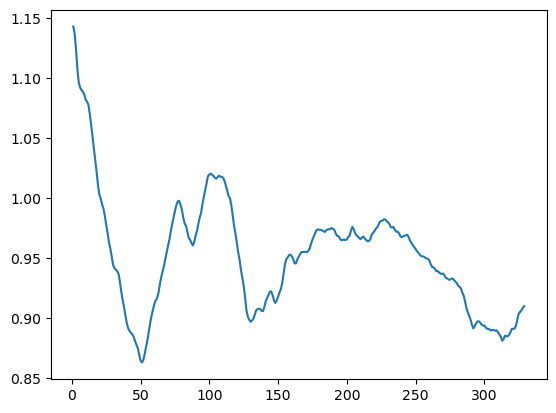

In [121]:
ax = df_load_yearly[2022].div(df_load_yearly[2021]).plot()
df_load_yearly[2022].loc[300:].dropna()
#.sub(df_load_yearly[2021]).loc[300:]*24

In [130]:
df_load_day_ahead[(df_load_day_ahead.index>='2022-10-01') & (df_load_day_ahead.index<'2022-11-01')]['SE_3'].mean()

8421.611559139785

(4000.0, 7200.0)

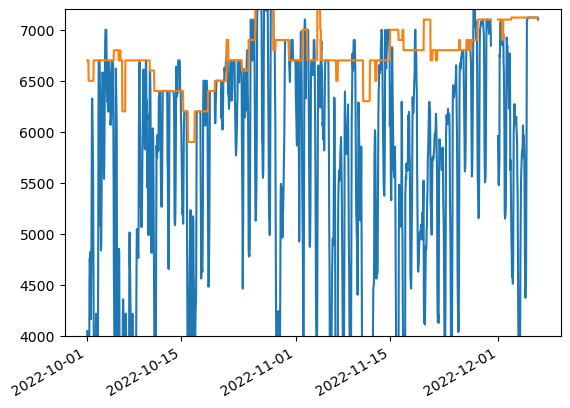

In [174]:
time_window = 1

from_bz = 'SE_2'
to_bz = 'SE_3'

df_flow_day_ahead.loc[(df_flow_day_ahead.index > '2022-10-01'), (from_bz, to_bz)].rolling(time_window).mean().plot()
ax = df_capacity_day_ahead.loc[(df_capacity_day_ahead.index > '2022-10-01'), (from_bz, to_bz)].rolling(time_window).mean().plot()

#df_price_day_ahead.loc[df_price_day_ahead.index > '2021-06-01', from_bz].rolling(time_window).mean().div(df_price_day_ahead.loc[df_price_day_ahead.index > '2021-06-01', to_bz].rolling(time_window).mean()).plot(secondary_y = True, alpha=0.5)


#ax.set_xlim(['2021-11-01', '2022-03-01'])
ax.set_ylim([4000, 7200])

<AxesSubplot:xlabel='SE_2', ylabel='SE_3'>

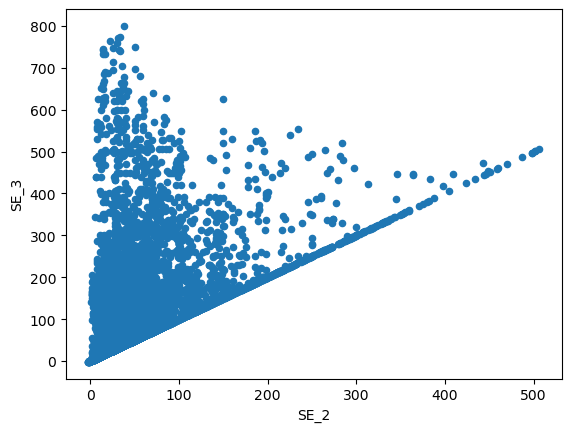

In [177]:
df_price_day_ahead[df_price_day_ahead.index>'2021'].plot(kind = 'scatter',x = 'SE_2', y = 'SE_3')

In [82]:
bz = 'SE_2'
bz_t = 'SE_3'

df_all = pd.concat([df_price_day_ahead[bz_t].div(df_price_day_ahead[bz]).rename('price'), df_load_day_ahead[bz].rename('load'), 
                    df_generation_day_ahead[bz].rename('prod'), df_flow_day_ahead[bz][bz_t].rename('flow'), 
                    df_capacity_day_ahead[bz][bz_t].rename('capa'), df_generation_type[bz]['Wind Onshore'].rename('wind')], axis=1)
df_all['export'] = df_all['prod'] - df_all['load']

In [80]:
df_generation_type[bz]['Wind Onshore'].dropna()

2020-01-01 00:00:00    1521.0
2020-01-01 01:00:00    1594.0
2020-01-01 02:00:00    1690.0
2020-01-01 03:00:00    1783.0
2020-01-01 04:00:00    1900.0
                        ...  
2022-11-28 08:00:00     922.0
2022-11-28 09:00:00     912.0
2022-11-28 10:00:00     824.0
2022-11-28 11:00:00     861.0
2022-11-28 12:00:00     810.0
Name: Wind Onshore, Length: 25497, dtype: float64

<AxesSubplot:>

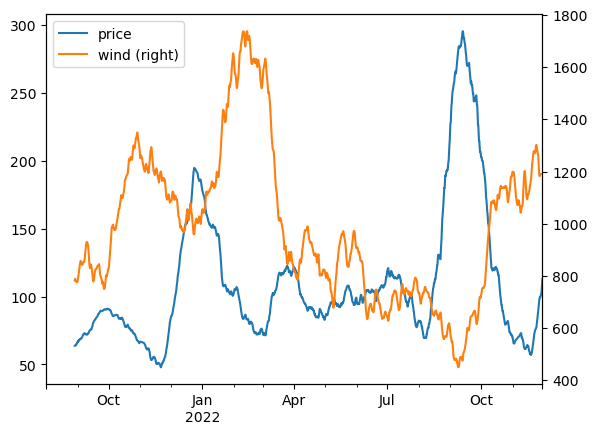

In [19]:
time_window = 24*7*4
df_cell = df_all[df_all.index > '2021-08-01'][['price', 'wind']].rolling(time_window, time_window-4).mean()
df_cell['wind'] = df_cell['wind']
df_cell.plot(secondary_y = 'wind')

Text(0.5, 1.0, 'Load wind')

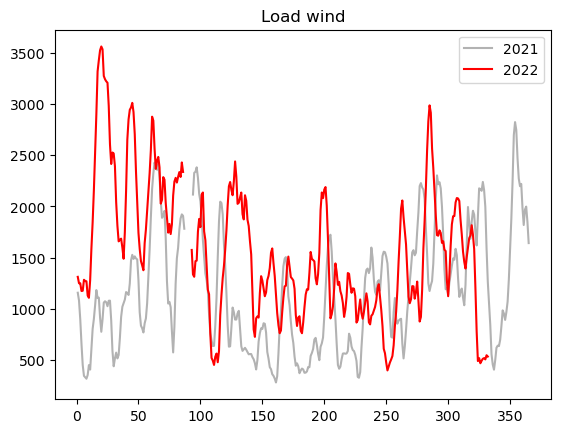

In [87]:

window = 24*7
bz = 'wind'
df_cell = df_all[bz]
df_load_yearly = (
    df_cell.rolling(window).mean()
    .groupby([df_cell.index.year, df_cell.index.dayofyear]).mean()
    .unstack(level=0)
)
f, ax = plt.subplots()
#df_load_yearly.loc[:,df_load_yearly.columns==2020].plot(ax=ax,color='blue', alpha = 0.6)
df_load_yearly.loc[:,df_load_yearly.columns==2021].plot(ax=ax,color='grey', alpha = 0.6)
df_load_yearly.loc[:,df_load_yearly.columns==2022].plot(ax=ax,color='red')
ax.set_title(f'Load {bz}')

In [207]:
df_price_day_ahead.groupby(df_price_day_ahead.index.date).mean()#.plot()

,AT,BE,DE_LU,DK_1,DK_2,EE,FI,FR,LT,LV,NL,NO_1,NO_2,NO_3,NO_4,PL,SE_1,SE_2,SE_3,SE_4
2016-01-01,NaN,23.658333,NaN,16.619167,16.619167,16.950435,16.950435,23.658333,28.510870,28.510870,25.719583,16.619167,16.619167,16.588750,16.588750,NaN,16.588750,16.588750,16.619167,16.619167
2016-01-02,NaN,24.279167,NaN,14.329583,15.615417,23.135833,23.135833,23.430833,31.451667,31.451667,28.387083,15.615417,15.397500,15.627917,15.627917,NaN,15.615417,15.615417,15.615417,15.615417
2016-01-03,NaN,19.063750,NaN,11.771250,16.958333,19.717917,19.717917,17.938750,36.325833,36.325833,23.787083,16.958333,16.050417,17.026250,17.026250,NaN,16.958333,16.958333,16.958333,16.958333
2016-01-04,NaN,28.424583,NaN,16.920833,19.062917,28.856250,28.856250,27.975417,44.625417,44.625417,30.184583,19.062917,18.568333,18.692083,18.692083,NaN,18.692083,18.692083,19.062917,19.062917
2016-01-05,NaN,34.083750,NaN,19.765833,21.181667,32.656667,32.656667,33.835833,46.247917,46.247917,33.138750,21.181667,19.765833,21.181667,20.434583,NaN,21.181667,21.181667,21.181667,21.181667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-11-25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,239.820833,239.820833,255.038750,256.462917
2022-11-26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,173.325417,173.325417,232.269583,236.204167
2022-11-27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,119.026250,119.026250,138.011667,138.011667
2022-11-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,187.757083,187.757083,188.569583,188.569583


<AxesSubplot:>

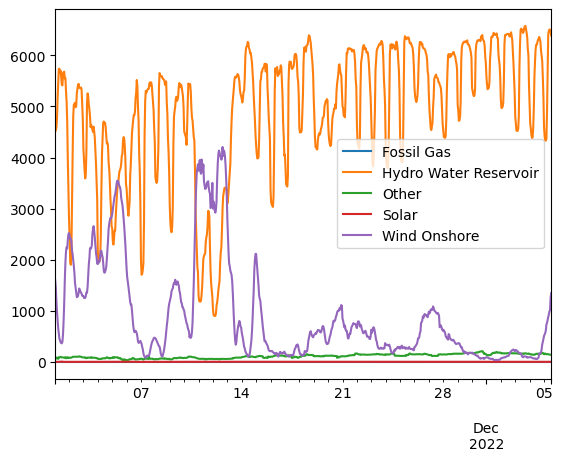

In [186]:
time_window = 1
df_generation_type.loc[df_generation_type.index > '2022-11-01']['SE_2'].rolling(time_window).mean().plot()

In [140]:
df_cap['SE_3'].sum(axis=1).rolling(time_window, time_window-100).mean().plot()
df_flow['SE_3'].sum(axis=1).rolling(time_window, time_window-100).mean().plot()

NameError: name 'df_cap' is not defined

In [212]:
df_load_gene = pd.concat([df_load_day_ahead['SE_3'].rename('load'), df_generation_day_ahead['SE_3'].rename('gen')],  axis=1)

window = 24*7
df_load_gene = df_load_gene.rolling(window, min_periods=window-10).mean()
df_load_gene = df_load_gene[df_load_gene.index > '2021-08-01'].dropna()

df_load_gene['gen'].div(df_load_gene['load']).plot()

<AxesSubplot:>

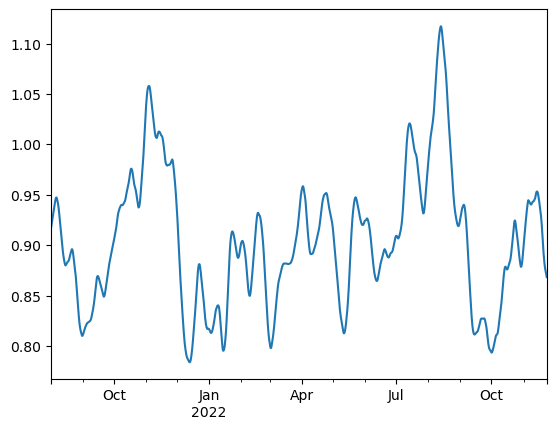

In [ ]:
window = 24*7
bz = 'SE_2'
df_load_yearly = (
    df_gen[bz].rolling(window, min_periods=window-10).mean()
    .groupby([df_gen.index.year, df_gen.index.dayofyear]).mean()
    .unstack(level=0)
)
f, ax = plt.subplots()
df_load_yearly.loc[:,df_load_yearly.columns!=2022].plot(ax=ax,color='grey', alpha = 0.6)
df_load_yearly.loc[:,df_load_yearly.columns==2022].plot(ax=ax,color='red')
ax.set_title(f'Load {bz}')

In [9]:
from entsoe import EntsoePandasClient


file_object = open("entsoe_api.txt", "r")
api_key = file_object.read()

In [42]:
# get load from api
# https://github.com/EnergieID/entsoe-py
# https://transparency.entsoe.eu/

client = EntsoePandasClient(api_key=api_key)

start = pd.Timestamp("20221115", tz="Europe/Stockholm") 
end = pd.Timestamp("20230101", tz="Europe/Stockholm")
country_code = "NO"
df_gen = client.query_generation(country_code, start=start, end=end)
print(df_gen.info())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 331 entries, 2022-11-15 00:00:00+01:00 to 2022-11-28 18:00:00+01:00
Freq: H
Data columns (total 9 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Biomass                          331 non-null    float64
 1   Fossil Gas                       178 non-null    float64
 2   Hydro Pumped Storage             331 non-null    float64
 3   Hydro Run-of-river and poundage  331 non-null    float64
 4   Hydro Water Reservoir            331 non-null    float64
 5   Other                            331 non-null    float64
 6   Other renewable                  331 non-null    float64
 7   Waste                            331 non-null    float64
 8   Wind Onshore                     331 non-null    float64
dtypes: float64(9)
memory usage: 25.9 KB
None


In [18]:
df_gen.index = df_gen.index.tz_localize(None)
df_gen = df_gen.resample('H', label='left').mean()
df_gen = df_gen.groupby(df_gen.index).mean()

In [45]:
df_generation_type['FR']

,"(Biomass, Actual Aggregated)","(Fossil Gas, Actual Aggregated)","(Fossil Hard coal, Actual Aggregated)","(Fossil Hard coal, Actual Consumption)","(Fossil Oil, Actual Aggregated)","(Hydro Pumped Storage, Actual Aggregated)","(Hydro Pumped Storage, Actual Consumption)","(Hydro Run-of-river and poundage, Actual Aggregated)","(Hydro Water Reservoir, Actual Aggregated)","(Hydro Water Reservoir, Actual Consumption)","(Nuclear, Actual Aggregated)","(Solar, Actual Aggregated)","(Waste, Actual Aggregated)","(Wind Onshore, Actual Aggregated)"
2016-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-01-01 01:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-01-01 02:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-01-01 03:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-01-01 04:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-11-28 08:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-11-28 09:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-11-28 10:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-11-28 11:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<AxesSubplot:>

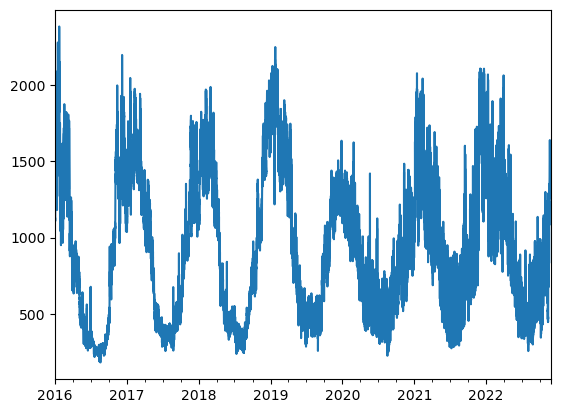

In [ ]:
df_generation_type['SE']['Other'].rolling(1).mean().plot()

In [59]:
type(('test', 'sfsdf', 'sdf'))

tuple

In [60]:
'sf' + 'asf'

'sfasf'